[**Blueprints for Text Analysis Using Python**](https://github.com/blueprints-for-text-analytics-python/blueprints-text)  
Jens Albrecht, Sidharth Ramachandran, Christian Winkler

**If you like the book or the code examples here, please leave a friendly comment on [Amazon.com](https://www.amazon.com/Blueprints-Text-Analytics-Using-Python/dp/149207408X)!**
<img src="../rating.png" width="100"/>

# Chapter 02:<div class='tocSkip'/>

## Remark<div class='tocSkip'/>

The code in this notebook differs slightly from the printed book. For example we frequently use pretty print (`pp.pprint`) instead of `print` and `tqdm`'s `progress_apply` instead of Pandas' `apply`. 

Moreover, several layout and formatting commands, like `figsize` to control figure size or subplot commands are removed in the book.

You may also find some lines marked with three hashes ###. Those are not in the book as well as they don't contribute to the concept.

All of this is done to simplify the code in the book and put the focus on the important parts instead of formatting.

## Setup<div class='tocSkip'/>

Set directory locations. If working on Google Colab: copy files and install required libraries.

In [1]:
import sys, os
ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    GIT_ROOT = 'https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master'
    os.system(f'wget {GIT_ROOT}/ch02/setup.py')

%run -i setup.py

You are working on a local system.
Files will be searched relative to "..".


## Load Python Settings<div class="tocSkip"/>

Common imports, defaults for formatting in Matplotlib, Pandas etc.

In [2]:
%run "$BASE_DIR/settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

# to print output of all statements and not just the last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# otherwise text between $ signs will be interpreted as formula and printed in italic
pd.set_option('display.html.use_mathjax', False)

# path to import blueprints packages
sys.path.append(BASE_DIR + '/packages')

In [3]:
# adjust matplotlib resolution for book version
matplotlib.rcParams.update({'figure.dpi': 200 })

# How to use APIs to extract and derive insights from text data

# Application Programming Interface

# Blueprint - Extracting data from an API using the requests module

In [5]:
import requests

response = requests.get('https://api.github.com/repositories',
                        headers={'Accept': 'application/vnd.github.v3+json'})
print(response.status_code)

200


In [6]:
print (response.encoding)
print (response.headers['Content-Type'])
print (response.headers['server'])

utf-8
application/json; charset=utf-8
GitHub.com


In [7]:
response.headers

{'date': 'Sun, 29 Nov 2020 20:24:58 GMT', 'content-type': 'application/json; charset=utf-8', 'server': 'GitHub.com', 'status': '200 OK', 'cache-control': 'public, max-age=60, s-maxage=60', 'vary': 'Accept, Accept-Encoding, Accept, X-Requested-With, Accept-Encoding', 'etag': 'W/"876f9ffc0192d9fe1d93075b361334a5e8f0858008a0a0dbd48f02819b0e2d99"', 'x-github-media-type': 'github.v3; format=json', 'link': '<https://api.github.com/repositories?since=369>; rel="next", <https://api.github.com/repositories{?since}>; rel="first"', 'access-control-expose-headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, Deprecation, Sunset', 'access-control-allow-origin': '*', 'strict-transport-security': 'max-age=31536000; includeSubdomains; preload', 'x-frame-options': 'deny', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=bloc

In [8]:
import json
print (json.dumps(response.json()[0], indent=2)[:200])

{
  "id": 1,
  "node_id": "MDEwOlJlcG9zaXRvcnkx",
  "name": "grit",
  "full_name": "mojombo/grit",
  "private": false,
  "owner": {
    "login": "mojombo",
    "id": 1,
    "node_id": "MDQ6VXNlcjE=",



In [9]:
response = requests.get('https://api.github.com/search/repositories')
print (response.status_code)

422


In [10]:
response = requests.get('https://api.github.com/search/repositories',
    params={'q': 'data_science+language:python'},
    headers={'Accept': 'application/vnd.github.v3.text-match+json'})
print(response.status_code)

200


In [11]:
from IPython.display import Markdown, display  ###
def printmd(string):  ###
    display(Markdown(string))  ###

for item in response.json()['items'][:5]:
    printmd('**' + item['name'] + '**' + ': repository ' +
            item['text_matches'][0]['property'] + ' - \"*' +
            item['text_matches'][0]['fragment'] + '*\" matched with ' + '**' +
            item['text_matches'][0]['matches'][0]['text'] + '**')

**data-science-from-scratch**: repository description - "*code for Data Science From Scratch book*" matched with **Data Science**

**data-science-blogs**: repository description - "*A curated list of data science blogs*" matched with **data science**

**data-scientist-roadmap**: repository description - "*Toturial coming with "data science roadmap" graphe.*" matched with **data science**

**galaxy**: repository description - "*Data intensive science for everyone.*" matched with **Data**

**metaflow**: repository description - "*Build and manage real-life data science projects with ease.*" matched with **data science**

In [12]:
response = requests.get(
    'https://api.github.com/repos/pytorch/pytorch/issues/comments')
print('Response Code', response.status_code)
print('Number of comments', len(response.json()))

Response Code 200
Number of comments 30


In [13]:
response.links

{'next': {'url': 'https://api.github.com/repositories/65600975/issues/comments?page=2',
  'rel': 'next'},
 'last': {'url': 'https://api.github.com/repositories/65600975/issues/comments?page=1334',
  'rel': 'last'}}

In [14]:
def get_all_pages(url, params=None, headers=None):
    output_json = []
    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        output_json = response.json()
        if 'next' in response.links:
            next_url = response.links['next']['url']
            if next_url is not None:
                output_json += get_all_pages(next_url, params, headers)
    return output_json


out = get_all_pages(
    "https://api.github.com/repos/pytorch/pytorch/issues/comments",
    params={
        'since': '2020-07-01T10:00:01Z',
        'sorted': 'created',
        'direction': 'desc'
    },
    headers={'Accept': 'application/vnd.github.v3+json'})
df = pd.DataFrame(out)

In [15]:
pd.set_option('display.max_colwidth', -1) ###
print (df['body'].count())
df[['id','created_at','body']].sample(1, random_state=42)

120


,id,created_at,body
44,652546226,2020-07-01T17:17:41Z,"I was affected by this today when scripting the seq2seq model in https://github.com/stanfordnlp/stanza In that case, `requires_grad=False` so it was fairly easy to remove."


In [16]:
response = requests.head(
    'https://api.github.com/repos/pytorch/pytorch/issues/comments')
print('X-Ratelimit-Limit', response.headers['X-Ratelimit-Limit'])
print('X-Ratelimit-Remaining', response.headers['X-Ratelimit-Remaining'])

# Converting UTC time to human-readable format
import datetime
print(
    'Rate Limits reset at',
    datetime.datetime.fromtimestamp(int(
        response.headers['X-RateLimit-Reset'])).strftime('%c'))

X-Ratelimit-Limit 60
X-Ratelimit-Remaining 52
Rate Limits reset at Sun Nov 29 22:24:57 2020


In [17]:
from datetime import datetime
import time

def handle_rate_limits(response):
    now = datetime.now()
    reset_time = datetime.fromtimestamp(
        int(response.headers['X-RateLimit-Reset']))
    remaining_requests = response.headers['X-Ratelimit-Remaining']
    remaining_time = (reset_time - now).total_seconds()
    intervals = remaining_time / (1.0 + int(remaining_requests))
    print('Sleeping for', intervals)
    time.sleep(intervals)
    return True

In [18]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

retry_strategy = Retry(
    total=5,
    status_forcelist=[500, 503, 504],
    backoff_factor=1
)

retry_adapter = HTTPAdapter(max_retries=retry_strategy)

http = requests.Session()
http.mount("https://", retry_adapter)
http.mount("http://", retry_adapter)

response = http.get('https://api.github.com/search/repositories',
                   params={'q': 'data_science+language:python'})

for item in response.json()['items'][:5]:
    print (item['name'])

data-science-from-scratch
data-science-blogs
data-scientist-roadmap
galaxy
metaflow


In [19]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

retry_strategy = Retry(
    total=5,
    status_forcelist=[500, 503, 504],
    backoff_factor=1
)

retry_adapter = HTTPAdapter(max_retries=retry_strategy)

http = requests.Session()
http.mount("https://", retry_adapter)
http.mount("http://", retry_adapter)

def get_all_pages(url, param=None, header=None):
    output_json = []
    response = http.get(url, params=param, headers=header)
    if response.status_code == 200:
        output_json = response.json()
        if 'next' in response.links:
            next_url = response.links['next']['url']
            if (next_url is not None) and (handle_rate_limits(response)): 
                output_json += get_all_pages(next_url, param, header)
    return output_json

In [20]:
out = get_all_pages("https://api.github.com/repos/pytorch/pytorch/issues/comments", param={'since': '2020-04-01T00:00:01Z'})
df = pd.DataFrame(out)

Sleeping for 65.39738436538461
Sleeping for 65.36315499999999


# Blueprint - Extracting Twitter data with Tweepy

In [4]:
import tweepy

app_api_key = 'YOUR_APP_KEY_HERE' 
app_api_secret_key = 'YOUR_APP_SECRET_HERE'

auth = tweepy.AppAuthHandler(app_api_key, app_api_secret_key)
api = tweepy.API(auth)

print ('API Host', api.host)
print ('API Version', api.api_root)

API Host api.twitter.com
API Version /1.1


In [5]:
pd.set_option('display.max_colwidth', None) ###
search_term = 'cryptocurrency'

tweets = tweepy.Cursor(api.search,
                       q=search_term,
                       lang="en").items(100)

retrieved_tweets = [tweet._json for tweet in tweets]
df = pd.json_normalize(retrieved_tweets)

df[['text']].sample(3)

,text
43,"I wish I knew about cryptocurrency , years ago"
83,"Ethereum, the world’s second-largest cryptocurrency, soars above $4,000 for the first time https://t.co/tLgWArP9N3… https://t.co/rXHUisQE8w"
78,"Gary Vaynerchuk announced Wednesday he’s launching his first NFT collection, “VeeFriends,” a series of 10,255 chara… https://t.co/JgB4Khz5yx"


In [25]:
api = tweepy.API(auth,
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True,
                 retry_count=5,
                 retry_delay=10)

search_term = 'cryptocurrency OR crypto -filter:retweets'

tweets = tweepy.Cursor(api.search,
                       q=search_term,
                       lang="en",
                       tweet_mode='extended',
                       count=30).items(12000)

retrieved_tweets = [tweet._json for tweet in tweets]

df = pd.json_normalize(retrieved_tweets)
print('Number of retrieved tweets ', len(df))

Number of retrieved tweets  12000


In [26]:
df[['created_at','full_text','entities.hashtags']].sample(2)

,created_at,full_text,entities.hashtags
7169,Sun Nov 29 15:36:34 +0000 2020,Can blockchain pave the way for an ethical diamond industry? CRYPTO CRYPTO NEWS - https://t.co/lCZQsQHmcm,[]
72,Sun Nov 29 20:38:04 +0000 2020,1/2\n\n❓WHAT IF❓\n\n... There would be a company in #crypto that minimizes your #risk by maximizing your #trust while you're investing into the projects with the most #value?,"[{'text': 'crypto', 'indices': [48, 55]}, {'text': 'risk', 'indices': [76, 81]}, {'text': 'trust', 'indices': [101, 107]}, {'text': 'value', 'indices': [163, 169]}]"


In [27]:
def extract_entities(entity_list):
    entities = set()
    if len(entity_list) != 0:
        for item in entity_list:
            for key,value in item.items():
                if key == 'text':
                    entities.add(value.lower())
    return list(entities)

<AxesSubplot:>

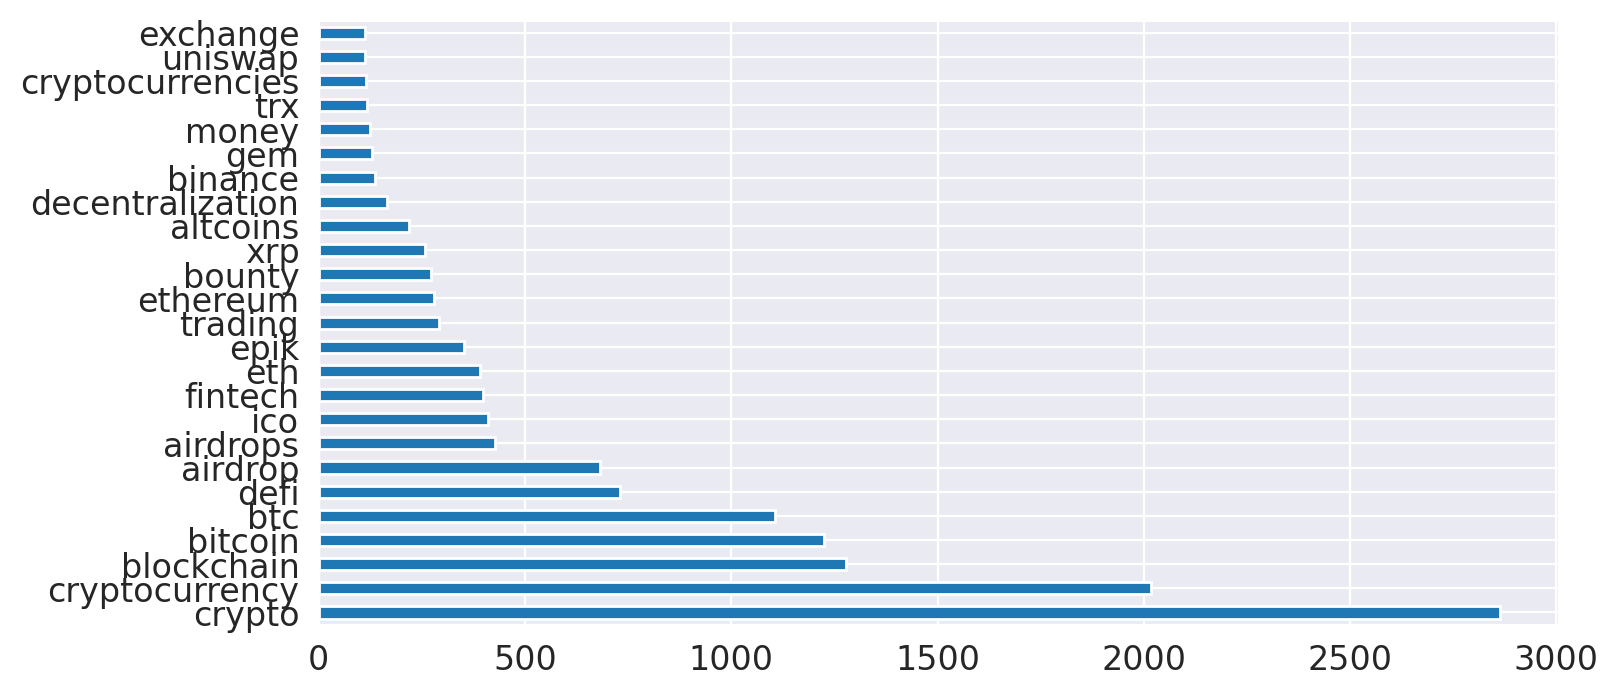

In [28]:
df['Entities'] = df['entities.hashtags'].apply(extract_entities)
pd.Series(np.concatenate(df['Entities'])).value_counts()[:25].plot(kind='barh')

In [29]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweets = tweepy.Cursor(api.user_timeline,
                       screen_name='MercedesAMGF1',
                       lang="en",
                       tweet_mode='extended',
                       count=100).items(5000)

retrieved_tweets = [tweet._json for tweet in tweets]
df = pd.io.json.json_normalize(retrieved_tweets)
print ('Number of retrieved tweets ', len(df))

Number of retrieved tweets  3243


In [30]:
def get_user_timeline(screen_name):
    api = tweepy.API(auth,
                     wait_on_rate_limit=True,
                     wait_on_rate_limit_notify=True)
    tweets = tweepy.Cursor(api.user_timeline,
                           screen_name=screen_name,
                           lang="en",
                           tweet_mode='extended',
                           count=200).items()
    retrieved_tweets = [tweet._json for tweet in tweets]
    df = pd.io.json.json_normalize(retrieved_tweets)
    df = df[~df['retweeted_status.id'].isna()]
    return df

In [56]:
df_mercedes = get_user_timeline('MercedesAMGF1')
print ('Number of Tweets from Mercedes', len(df_mercedes))
df_ferrari = get_user_timeline('ScuderiaFerrari')
print ('Number of Tweets from Ferrari', len(df_ferrari))

Number of Tweets from Mercedes 203
Number of Tweets from Ferrari 168


In [52]:
import regex as re
import nltk
from collections import Counter
from wordcloud import WordCloud

stopwords = set(nltk.corpus.stopwords.words('english'))
RE_LETTER = re.compile(r'\b\p{L}{2,}\b')

def tokenize(text):
    return RE_LETTER.findall(text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

In [107]:
def wordcloud_blueprint(df, colName, max_words, num_stopwords):
    # Step 1: Convert input text column into tokens
    df['tokens'] = df[colName].map(prepare)
    
    # Step 2: Determine the frequency of each of the tokens
    freq_df = count_words(df)
    
    # Step 3: Generate the wordcloud using the frequencies controlling for stopwords
    wordcloud(freq_df['freq'], max_words, stopwords=freq_df.head(num_stopwords).index)

<Figure size 2400x800 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

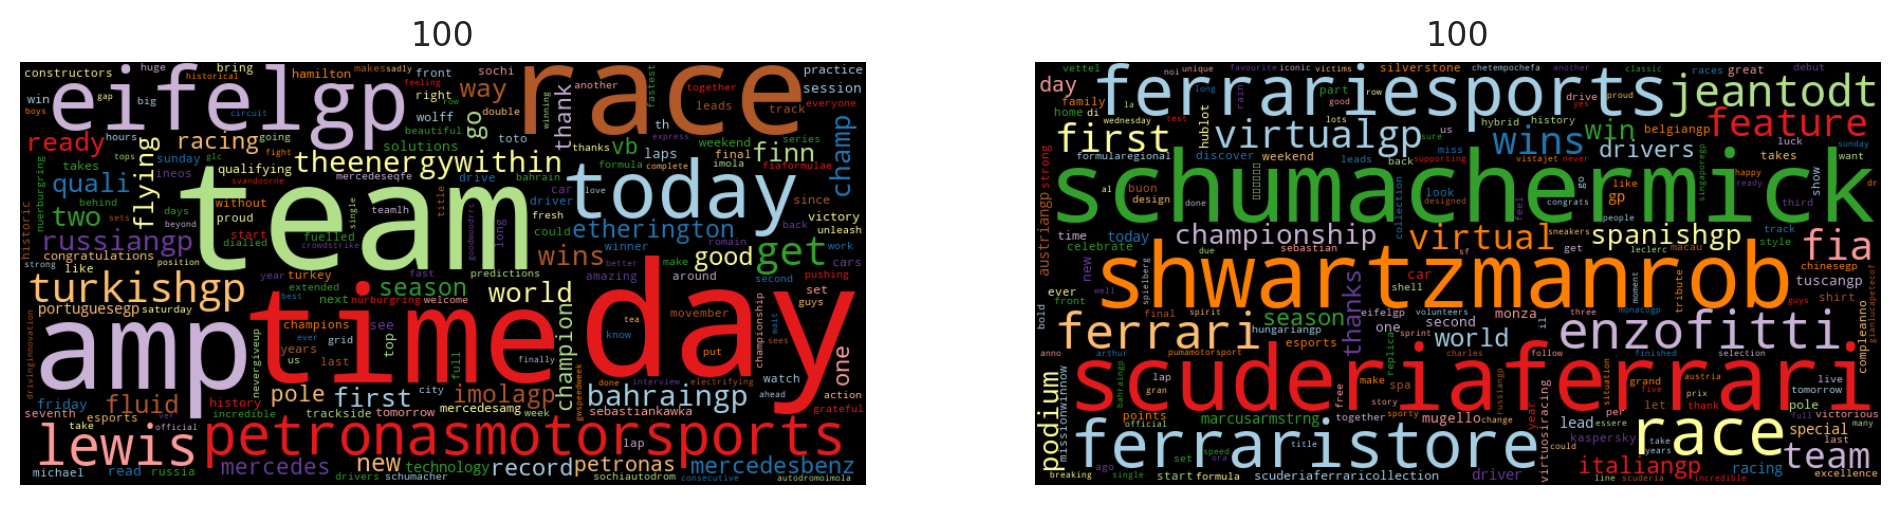

In [109]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  ###
wordcloud_blueprint(df_mercedes, 'full_text',
          max_words=100,
          num_stopwords=5)

plt.subplot(1, 2, 2)  ###
wordcloud_blueprint(df_ferrari, 'full_text',
          max_words=100,
          num_stopwords=5)

In [6]:
from datetime import datetime
import math

class FileStreamListener(tweepy.StreamListener):
    
    def __init__(self, max_tweets=math.inf):
        self.num_tweets = 0
        self.TWEETS_FILE_SIZE = 10
        self.num_files = 0
        self.tweets = []
        self.max_tweets = max_tweets      
    
    def on_data(self, data):
        while (self.num_files * self.TWEETS_FILE_SIZE < self.max_tweets):
            self.tweets.append(json.loads(data))
            self.num_tweets += 1
            if (self.num_tweets < self.TWEETS_FILE_SIZE):
                return True
            else:
                filename = 'Tweets_' + str(datetime.now().time().strftime("%H%M%S%f")) + '.txt'
                print (self.TWEETS_FILE_SIZE, 'Tweets saved to', filename)
                file = open(filename, "w")
                json.dump(self.tweets, file)
                file.close()
                self.num_files += 1
                self.tweets = []
                self.num_tweets = 0
                return True
        return False
        
    def on_error(self, status_code):
        if status_code == 420:
            print ('Too many requests were made, please stagger requests')
            return False
        else:
            print ('Error {}'.format(status_code))
            return False

In [7]:
user_access_token = 'YOUR_USER_ACCESS_TOKEN_HERE'
user_access_secret = 'YOUR_USER_ACCESS_SECRET_HERE'

auth = tweepy.OAuthHandler(app_api_key, app_api_secret_key)
auth.set_access_token(user_access_token, user_access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
fileStreamListener = FileStreamListener(20)
fileStream = tweepy.Stream(auth=api.auth,
                           listener=fileStreamListener,
                           tweet_mode='extended')
fileStream.filter(track=['cryptocurrency'])

10 Tweets saved to Tweets_104210491845.txt
10 Tweets saved to Tweets_104212062715.txt


In [9]:
df = pd.json_normalize(json.load(open('Tweets_104210491845.txt')))
df.head(2)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,...,retweeted_status.favorited,retweeted_status.retweeted,retweeted_status.possibly_sensitive,retweeted_status.filter_level,retweeted_status.lang,display_text_range,possibly_sensitive,quoted_status.entities.media,quoted_status.extended_entities.media,extended_tweet.full_text,extended_tweet.display_text_range,extended_tweet.entities.hashtags,extended_tweet.entities.urls,extended_tweet.entities.user_mentions,extended_tweet.entities.symbols
0,Mon May 10 08:42:03 +0000 2021,1391674884531523591,1391674884531523591,@Acousticmoron @Acousticmemer @htrtomoon,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,nan,None,1251401938760949760.00,1251401938760949760,Acousticmoron,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon May 10 08:42:03 +0000 2021,1391674885915627526,1391674885915627526,"RT @AXISDeFi: AXIS DeFi — A New Era\n\nAxis has been testing several concepts, and we are beyond excited about the new direction of the proje…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,nan,None,nan,None,None,None,None,None,None,...,False,False,False,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia(
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

p_wiki = wiki_wiki.page('Cryptocurrency')
print (p_wiki.text[:200], '....')

A cryptocurrency (or crypto currency or crypto for short) is a digital asset designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger existing in a for ....


# Closing Remarks